<a href="https://colab.research.google.com/github/sahirat/Placement-Prediction/blob/master/placement_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import  numpy as np
import pandas as pd

In [13]:
df=pd.read_csv('placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
import matplotlib.pyplot as plt

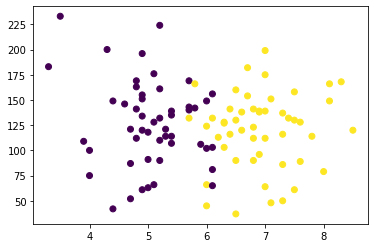

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [17]:
X_train

,cgpa,iq
36,5.7,140.0
10,6.0,45.0
68,4.0,75.0
19,5.2,132.0
72,7.3,116.0
...,...,...
17,3.3,183.0
15,5.1,176.0
85,5.8,166.0
6,5.7,143.0


In [18]:
y_train

36    0
10    1
68    0
19    0
72    1
     ..
17    0
15    0
85    1
6     0
66    1
Name: placement, Length: 90, dtype: int64

In [19]:
X_test

,cgpa,iq
65,8.1,166.0
5,7.1,48.0
86,5.1,128.0
28,5.2,90.0
47,5.2,161.0
88,4.4,149.0
69,8.5,120.0
0,6.8,123.0
27,6.0,124.0
26,7.0,199.0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_train

array([[-0.22698627,  0.43435229],
       [ 0.0429974 , -1.96159098],
       [-1.75689371, -1.20497731],
       [-0.67695905,  0.23258864],
       [ 1.21292662, -0.17093864],
       [ 0.67295929,  0.78743866],
       [ 0.13299195,  0.23258864],
       [ 1.21292662, -0.92755231],
       [-0.85694816, -0.80145003],
       [ 1.39291573,  0.18214773],
       [-0.85694816, -0.12049773],
       [ 1.6628994 , -0.22137955],
       [-1.03693727,  1.01442276],
       [-1.03693727,  0.45957274],
       [ 0.58296473, -0.07005682],
       [ 2.11287218,  1.14052504],
       [ 0.22298651, -0.24660001],
       [ 0.0429974 , -1.43196141],
       [ 1.48291029,  0.13170682],
       [ 0.13299195, -0.49880456],
       [-0.49696993, -0.22137955],
       [ 0.0429974 , -0.52402502],
       [ 0.94294295, -1.48240232],
       [ 0.40297562,  0.45957274],
       [ 0.13299195, -1.45718187],
       [ 1.03293751,  0.7117773 ],
       [-1.12693182, -1.78504779],
       [-1.39691549, -2.03725234],
       [-0.85694816,

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[ 1.93288306,  1.09008413],
       [ 1.03293751, -1.88592961],
       [-0.7669536 ,  0.13170682],
       [-0.67695905, -0.82667048],
       [-0.67695905,  0.96398185],
       [-1.39691549,  0.66133639],
       [ 2.29286129, -0.07005682],
       [ 0.76295384,  0.00560455],
       [ 0.0429974 ,  0.030825  ],
       [ 0.94294295,  1.92235916]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_test

65    1
5     1
86    0
28    0
47    0
88    0
69    1
0     1
27    1
26    1
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.9

In [33]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


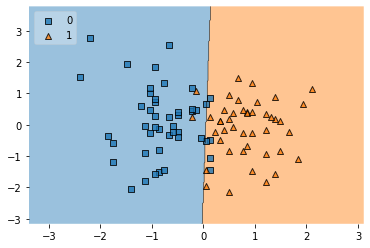

In [34]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)